In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import learning_curve 
from sklearn.metrics import make_scorer 
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
#дополнительное задание
class Lin_Regr:
    
    def __init__(self, csv_file, array_x = [], array_y=[], reg_type = None, graphic = False):
        self.csv_file = pd.read_csv(csv_file, sep=';')
        self.array_x = self.csv_file['X'].values.reshape(-1, 1)
        try:
            self.array_y = np.array([float(i.replace(',','.')) for i in self.csv_file['Y'].values])
        except AttributeError:
            self.array_y = self.csv_file['Y'].values
        
        
    def LinReg(self):
        x = self.array_x.tolist()
        y = self.array_y.tolist()
        model = LinearRegression().fit(x, y)
        r_sq = model.score(x, y)
        y_pred = model.predict(x)
        
        print('Коэффициент определения:', r_sq)
        print('Коэффициент b0:', model.intercept_)
        print('Коэффициент b1:', str(model.coef_[0]))
        print('Предсказанные переменные Y :', y_pred, sep='\n')
        return(y_pred)
        
        
    def pred(self, x_new):
        x = self.array_x.tolist()
        y = self.array_y.tolist()
        model = LinearRegression().fit(x, y)
        x_new = np.array(x_new)
        y_new = model.predict(x_new.reshape(-1,1))
        return(y_new)
    
    def draw(self):
        X = self.array_x
        Y = self.array_y
        mean_x = np.mean(X)
        mean_y = np.mean(Y)

        m = (len(X))

        numer = 0
        denom = 0

        for i in range(m):
            numer += (X[i] - mean_x) * (Y[i] - mean_y)
            denom += (X[i] - mean_x) **2
        b1 = numer / denom
        b0 = mean_y - (b1 * mean_x)
        max_x = np.max(X) +100
        min_x = np.min(X) -100

        x = np.linspace(min_x, max_x, 100)
        y = b0 + b1 * x

        plt.plot(x,y, color = '#58b970', label = 'Линия регрессии')
        plt.scatter(X,Y, c = '#ef5423', label = 'Изначальные точки')

        plt.xlabel('X')
        plt.ylabel('y')
        plt.legend()
        plt.show

        print(b1, b0)
    
    def graph(self):
        y = Lin_Regr.LinReg(self)
        plt.scatter(self.array_x.reshape(1,-1), self.array_y)
        plt.plot(self.array_x, y, 'r')
    
    def l1_reg(self):
        x = self.array_x.tolist()
        y = self.array_y.tolist()
        model = LinearRegression().fit(x, y)
        r_sq = model.score(x, y)
        y_pred = model.predict(x)
        
        
        X = np.vstack([np.ones(len(self.array_x)), self.array_x]).T
        w_ml = np.linalg.solve(X.T.dot(X), X.T.dot(self.array_y))
        Yhat_ml = X.dot(w_ml)
        plt.scatter(X[:,1], self.array_y)
        plt.plot(X[:,1], Yhat_ml)
        plt.show()

    def l2_reg(self):
        l2 = 1000.0

        w_map = np.linalg.solve(l2*np.eye(2) + X.T.dot(X), X.T.dot(self.array_y))
        Yhat_map = X.dot(w_map)
        plt.scatter(X[:,1], Y)
        plt.plot(X[:,1], Yhat_ml, label='maximum likehood')
        plt.plot(X[:,1], Yhat_map, label='map')
        plt.legend()
        plt.show()
        

Коэффициент определения: 0.0002508138373283897
Коэффициент b0: 44.15167318557149
Коэффициент b1: 0.012975724840131635
Предсказанные переменные Y :
[44.16464891 44.17762464 44.19060036 44.20357608 44.21655181 44.22952753
 44.24250326 44.25547898 44.26845471 44.28143043 44.29440616 44.30738188
 44.32035761 44.33333333 44.34630906 44.35928478 44.37226051 44.38523623
 44.39821196 44.41118768 44.42416341 44.43713913 44.45011486 44.46309058
 44.47606631 44.48904203 44.50201776 44.51499348 44.52796921 44.54094493
 44.55392066 44.56689638 44.57987211 44.59284783 44.60582355 44.61879928
 44.631775   44.64475073 44.65772645 44.67070218 44.6836779  44.69665363
 44.70962935 44.72260508 44.7355808  44.74855653 44.76153225 44.77450798
 44.7874837  44.80045943 44.81343515 44.82641088 44.8393866  44.85236233
 44.86533805 44.87831378 44.8912895  44.90426523 44.91724095 44.93021668
 44.9431924  44.95616813 44.96914385 44.98211958 44.9950953  45.00807103
 45.02104675 45.03402247 45.0469982  45.05997392 4

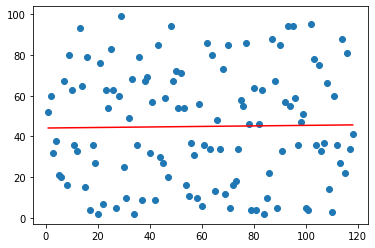

In [3]:
LR = Lin_Regr('prog.csv')
LR.LinReg()
print(LR.graph())